Bit Error Rate (BER): 0.009000


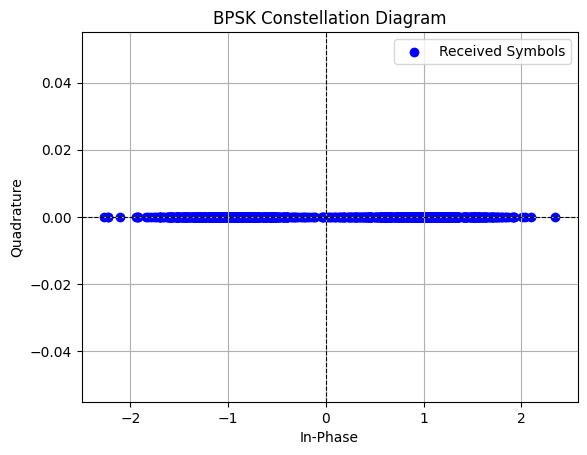

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_symbols = 1000
symbol_rate = 1000  # symbols per second
snr_db = 5  # SNR in dB

# BPSK modulation
symbols = np.random.randint(0, 2, num_symbols) * 2 - 1  # BPSK symbols (-1, 1)

# AWGN channel
snr_linear = 10**(snr_db / 10.0)
noise_std = np.sqrt(1 / (2 * snr_linear))  # Assuming unit power symbols
noise = noise_std * np.random.randn(num_symbols)

# Received signal (with AWGN)
received_signal = symbols + noise

# BPSK demodulation
detected_symbols = np.sign(received_signal)

# Calculate BER
bit_errors = np.sum(symbols != detected_symbols)
ber = bit_errors / num_symbols

print(f"Bit Error Rate (BER): {ber:.6f}")

# Plot the constellation diagram
plt.scatter(received_signal.real, received_signal.imag, marker='o', color='b', label='Received Symbols')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.8)
plt.title("BPSK Constellation Diagram")
plt.xlabel("In-Phase")
plt.ylabel("Quadrature")
plt.legend()
plt.grid()
plt.show()


Bit Error Rate (BER): 0.500000


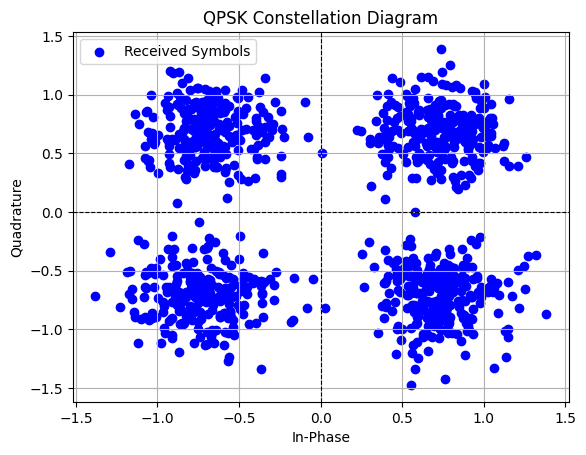

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_symbols = 1000
symbol_rate = 1000  # symbols per second
snr_db = 10  # SNR in dB

# QPSK modulation
symbols = (np.random.randint(0, 2, num_symbols) * 2 - 1) + \
          1j * (np.random.randint(0, 2, num_symbols) * 2 - 1)  # QPSK symbols

# Normalize symbol energy
symbols /= np.sqrt(2)

# AWGN channel
snr_linear = 10**(snr_db / 10.0)
noise_std = np.sqrt(1 / (2 * snr_linear))  # Assuming unit power symbols
noise = noise_std * (np.random.randn(num_symbols) + 1j * np.random.randn(num_symbols))

# Received signal (with AWGN)
received_signal = symbols + noise

# QPSK demodulation
detected_symbols = np.sign(np.real(received_signal)) + 1j * np.sign(np.imag(received_signal))

# Calculate BER
bit_errors = np.sum(symbols != detected_symbols)
ber = bit_errors / (2 * num_symbols)  # QPSK has two bits per symbol

print(f"Bit Error Rate (BER): {ber:.6f}")

# Plot the constellation diagram
plt.scatter(np.real(received_signal), np.imag(received_signal), marker='o', color='b', label='Received Symbols')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.8)
plt.title("QPSK Constellation Diagram")
plt.xlabel("In-Phase")
plt.ylabel("Quadrature")
plt.legend()
plt.grid()
plt.show()


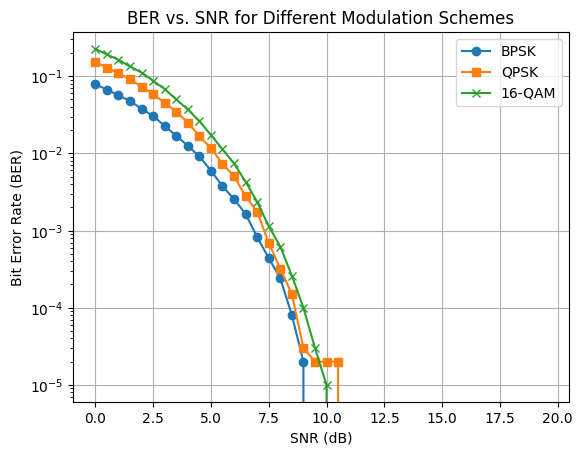

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_symbols = 100000

snr_range_db = np.arange(0, 20, 0.5)  # Range of SNR values in dB

# BPSK modulation
bpsk_symbols = np.random.randint(0, 2, num_symbols) * 2 - 1  # BPSK symbols

# QPSK modulation
qpsk_symbols = (np.random.randint(0, 2, num_symbols) * 2 - 1) + \
               1j * (np.random.randint(0, 2, num_symbols) * 2 - 1)  # QPSK symbols

# 16-QAM modulation
def generate_16qam_symbols(num_symbols):
    real_symbols = 2 * np.random.randint(0, 4, num_symbols) - 3
    imag_symbols = 2 * np.random.randint(0, 4, num_symbols) - 3
    return real_symbols + 1j * imag_symbols

qam16_symbols = generate_16qam_symbols(num_symbols)


# AWGN channel
def simulate_awgn_channel(symbols, snr_db):
    snr_linear = 10**(snr_db / 10.0)
    noise_std = np.sqrt(1 / (2 * snr_linear))  # Assuming unit power symbols
    noise = noise_std * (np.random.randn(len(symbols)) + 1j * np.random.randn(len(symbols)))
    received_signal = symbols + noise
    return received_signal

# Calculate BER
def calculate_ber(sent_symbols, received_symbols):
    bit_errors = np.sum(sent_symbols != received_symbols)
    return bit_errors / len(sent_symbols)

def demodulate_16qam(received_symbols):
    demod_symbols = np.zeros_like(received_symbols, dtype=np.complex128)

    demod_symbols.real = 2 * np.floor(np.real(received_symbols) / 2) + 1
    demod_symbols.real[demod_symbols.real > 3] = 3
    demod_symbols.real[demod_symbols.real < -3] = -3

    demod_symbols.imag = 2 * np.floor(np.imag(received_symbols) / 2) + 1
    demod_symbols.imag[demod_symbols.imag > 3] = 3
    demod_symbols.imag[demod_symbols.imag < -3] = -3

    return demod_symbols

# Simulation
ber_bpsk = []
ber_qpsk = []
ber_16qam = []

for snr_db in snr_range_db:
    received_bpsk = simulate_awgn_channel(bpsk_symbols, snr_db)
    received_qpsk = simulate_awgn_channel(qpsk_symbols, snr_db)
    received_16qam = simulate_awgn_channel(qam16_symbols, snr_db)

    detected_bpsk = np.sign(received_bpsk)
    detected_qpsk = np.sign(np.real(received_qpsk)) + 1j * np.sign(np.imag(received_qpsk))
    detected_16qam = demodulate_16qam(received_16qam)

    ber_bpsk.append(calculate_ber(bpsk_symbols, detected_bpsk))
    ber_qpsk.append(calculate_ber(qpsk_symbols, detected_qpsk))
    ber_16qam.append(calculate_ber(qam16_symbols, detected_16qam))

# Plot BER vs. SNR
plt.plot(snr_range_db, ber_bpsk, marker='o', label='BPSK')
plt.plot(snr_range_db, ber_qpsk, marker='s', label='QPSK')
plt.plot(snr_range_db, ber_16qam, marker='x', label='16-QAM')
plt.yscale('log')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('BER vs. SNR for Different Modulation Schemes')
plt.legend()
plt.grid()
plt.show()


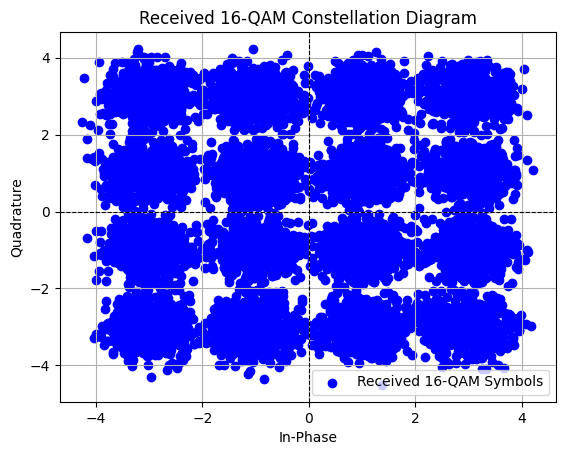

Bit Error Rate (BER): 0.015500


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_symbols = 10000
snr_db = 5  # SNR in dB

# 16-QAM modulation
def generate_16qam_symbols(num_symbols):
    return (2 * np.random.randint(0, 4, num_symbols) - 3) + \
           1j * (2 * np.random.randint(0, 4, num_symbols) - 3)

qam16_symbols = generate_16qam_symbols(num_symbols)

# AWGN channel
def simulate_awgn_channel(symbols, snr_db):
    snr_linear = 10**(snr_db / 10.0)
    noise_std = np.sqrt(1 / (2 * snr_linear))  # Assuming unit power symbols
    noise = noise_std * (np.random.randn(len(symbols)) + 1j * np.random.randn(len(symbols)))
    received_signal = symbols + noise
    return received_signal

# Demodulation for 16-QAM
def demodulate_16qam(received_symbols):
    demod_symbols = np.zeros_like(received_symbols, dtype=np.complex128)

    demod_symbols.real = 2 * np.floor(np.real(received_symbols) / 2) + 1
    demod_symbols.real[demod_symbols.real > 3] = 3
    demod_symbols.real[demod_symbols.real < -3] = -3

    demod_symbols.imag = 2 * np.floor(np.imag(received_symbols) / 2) + 1
    demod_symbols.imag[demod_symbols.imag > 3] = 3
    demod_symbols.imag[demod_symbols.imag < -3] = -3

    return demod_symbols


# Calculate BER
def calculate_ber(sent_symbols, received_symbols):
    bit_errors = np.sum(sent_symbols != received_symbols)
    return bit_errors / len(sent_symbols)

# Simulation
received_16qam = simulate_awgn_channel(qam16_symbols, snr_db)
demodulated_16qam = demodulate_16qam(received_16qam)
ber_16qam = calculate_ber(qam16_symbols, demodulated_16qam)

# Plot the received symbols constellation diagram
plt.scatter(np.real(received_16qam), np.imag(received_16qam), marker='o', color='b', label='Received 16-QAM Symbols')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.8)
plt.title("Received 16-QAM Constellation Diagram")
plt.xlabel("In-Phase")
plt.ylabel("Quadrature")
plt.legend()
plt.grid()
plt.show()

print(f"Bit Error Rate (BER): {ber_16qam:.6f}")





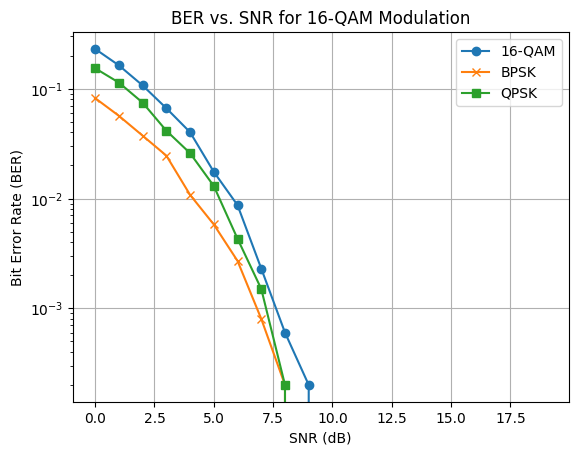

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_symbols = 10000
snr_range_db = np.arange(0, 20, 1)  # Range of SNR values in dB

# 16-QAM modulation
def generate_16qam_symbols(num_symbols):
    return (2 * np.random.randint(0, 4, num_symbols) - 3) + \
           1j * (2 * np.random.randint(0, 4, num_symbols) - 3)

qam16_symbols = generate_16qam_symbols(num_symbols)

# AWGN channel
def simulate_awgn_channel(symbols, snr_db):
    snr_linear = 10**(snr_db / 10.0)
    noise_std = np.sqrt(1 / (2 * snr_linear))  # Assuming unit power symbols
    noise = noise_std * (np.random.randn(len(symbols)) + 1j * np.random.randn(len(symbols)))
    received_signal = symbols + noise
    return received_signal

# Demodulation for 16-QAM
def demodulate_16qam(received_symbols):
    demod_symbols = np.zeros_like(received_symbols, dtype=np.complex128)

    demod_symbols.real = 2 * np.floor(np.real(received_symbols) / 2) + 1
    demod_symbols.real[demod_symbols.real > 3] = 3
    demod_symbols.real[demod_symbols.real < -3] = -3

    demod_symbols.imag = 2 * np.floor(np.imag(received_symbols) / 2) + 1
    demod_symbols.imag[demod_symbols.imag > 3] = 3
    demod_symbols.imag[demod_symbols.imag < -3] = -3

    return demod_symbols

# Calculate BER
def calculate_ber(sent_symbols, received_symbols):
    bit_errors = np.sum(sent_symbols != received_symbols)
    return bit_errors / len(sent_symbols)

# Simulation
ber_16qam = []

for snr_db in snr_range_db:
    received_16qam = simulate_awgn_channel(qam16_symbols, snr_db)
    demodulated_16qam = demodulate_16qam(received_16qam)
    ber_16qam.append(calculate_ber(qam16_symbols, demodulated_16qam))

# Plot BER vs. SNR
plt.plot(snr_range_db, ber_16qam, marker='o', label='16-QAM')
plt.plot(snr_range_db, ber_bpsk, marker='x', label='BPSK')
plt.plot(snr_range_db, ber_qpsk, marker='s', label='QPSK')
plt.yscale('log')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('BER vs. SNR for 16-QAM Modulation')
plt.legend()
plt.grid()
plt.show()


<ipython-input-51-1e7dced1941d>:35: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  bit_errors = np.sum(sent_symbols != received_symbols)


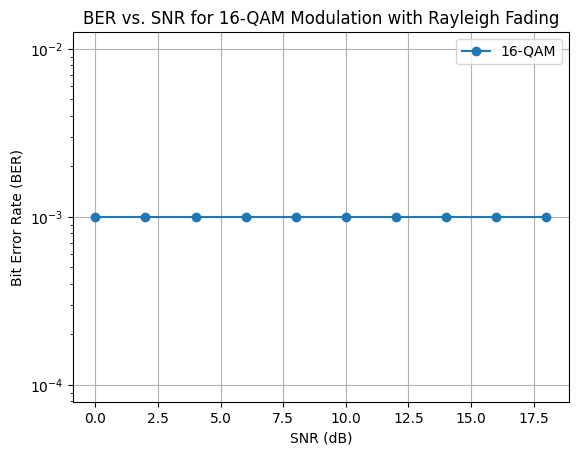

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_symbols = 1000
snr_range_db = np.arange(0, 20, 2)  # Range of SNR values in dB

# 16-QAM modulation
def generate_16qam_symbols(num_symbols):
    return (2 * np.random.randint(0, 4, num_symbols) - 3) + \
           1j * (2 * np.random.randint(0, 4, num_symbols) - 3)

qam16_symbols = generate_16qam_symbols(num_symbols)

# Rayleigh fading channel
def simulate_rayleigh_fading_channel(symbols):
    channel_coefficients = (np.random.randn(len(symbols)) + 1j * np.random.randn(len(symbols))) / np.sqrt(2)
    received_signal = symbols * channel_coefficients
    return received_signal

# AWGN channel
def simulate_awgn_channel(signal, snr_db):
    snr_linear = 10**(snr_db / 10.0)
    noise_std = np.sqrt(1 / (2 * snr_linear))  # Assuming unit power symbols
    noise = noise_std * (np.random.randn(len(signal)) + 1j * np.random.randn(len(signal)))
    received_signal = signal + noise
    return received_signal



# Simulation
ber_16qam = []

for snr_db in snr_range_db:
    received_16qam = simulate_rayleigh_fading_channel(received_16qam)
    received_16qam = simulate_awgn_channel(received_16qam, snr_db)
    demodulated_16qam = demodulate_16qam(received_16qam)
    ber_16qam.append(calculate_ber(qam16_symbols, demodulated_16qam))

# Plot BER vs. SNR
plt.plot(snr_range_db, ber_16qam, marker='o', label='16-QAM')
plt.yscale('log')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('BER vs. SNR for 16-QAM Modulation with Rayleigh Fading')
plt.legend()
plt.grid()
plt.show()


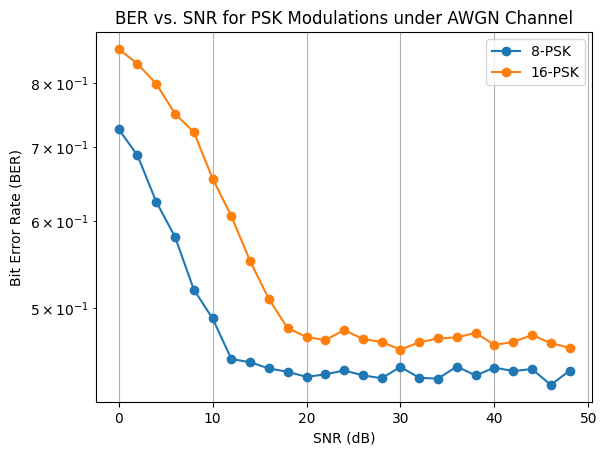

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_symbols = 10000
snr_range_db = np.arange(0, 50, 2)  # Range of SNR values in dB

# Modulation
def generate_psk_symbols(num_symbols, num_phase_levels):
    phase_angles = np.linspace(0, 2 * np.pi, num_phase_levels, endpoint=False)
    symbols = np.exp(1j * phase_angles[np.random.randint(0, num_phase_levels, num_symbols)])
    return symbols

# AWGN channel
def simulate_awgn_channel(signal, snr_db):
    snr_linear = 10**(snr_db / 10.0)
    noise_std = np.sqrt(1 / (2 * snr_linear))  # Assuming unit power symbols
    noise = noise_std * (np.random.randn(len(signal)) + 1j * np.random.randn(len(signal)))
    received_signal = signal + noise
    return received_signal

# Demodulation for PSK
def demodulate_psk(received_symbols, num_phase_levels):
    phase_angles = np.linspace(0, 2 * np.pi, num_phase_levels, endpoint=False)
    demodulated_symbols = np.angle(received_symbols)
    quantized_symbols = np.exp(1j * phase_angles[np.argmin(np.abs(demodulated_symbols[:, None] - phase_angles), axis=1)])
    return quantized_symbols

# Calculate BER
def calculate_ber(sent_symbols, received_symbols):
    bit_errors = np.sum(sent_symbols != received_symbols)
    return bit_errors / len(sent_symbols)

# Simulation
ber_8psk = []
ber_16psk = []

for snr_db in snr_range_db:
    psk8_symbols = generate_psk_symbols(num_symbols, 8)
    psk16_symbols = generate_psk_symbols(num_symbols, 16)

    received_8psk = simulate_awgn_channel(psk8_symbols, snr_db)
    demodulated_8psk = demodulate_psk(received_8psk, 8)
    ber_8psk.append(calculate_ber(psk8_symbols, demodulated_8psk))

    received_16psk = simulate_awgn_channel(psk16_symbols, snr_db)
    demodulated_16psk = demodulate_psk(received_16psk, 16)
    ber_16psk.append(calculate_ber(psk16_symbols, demodulated_16psk))

# Plot BER vs. SNR
plt.plot(snr_range_db, ber_8psk, marker='o', label='8-PSK')
plt.plot(snr_range_db, ber_16psk, marker='o', label='16-PSK')
plt.yscale('log')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('BER vs. SNR for PSK Modulations under AWGN Channel')
plt.legend()
plt.grid()
plt.show()


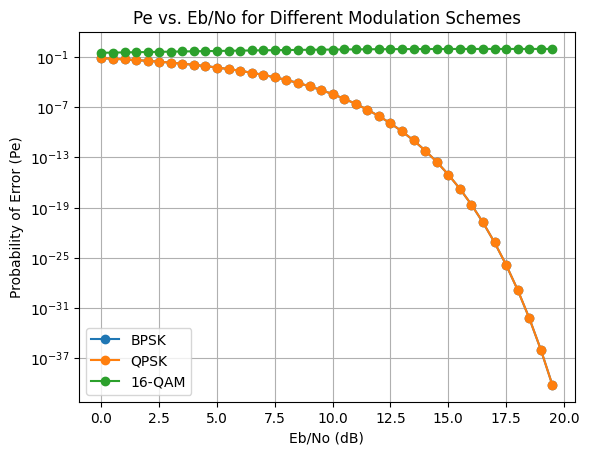

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

# Parameters
num_symbols = 10000
ebno_range_db = np.arange(0, 20, 0.5)  # Range of Eb/No values in dB

# Modulation
# (Define your modulation functions and symbol generation methods here)

# Calculate Theoretical Pe for BPSK
def theoretical_pe_bpsk(ebno_linear):
    return 0.5 * erfc(np.sqrt(ebno_linear))

# Calculate Theoretical Pe for QPSK
def theoretical_pe_qpsk(ebno_linear):
    return 0.5 * erfc(np.sqrt(ebno_linear))

# Calculate Theoretical Pe for QAM
def theoretical_pe_qam(ebno_linear, m):
    return 1 - (1 - 2**(-m)) * erfc(np.sqrt(3 * ebno_linear / (2 * (m - 1))))

# Simulation
pe_bpsk = []
pe_qpsk = []
pe_16qam = []

for ebno_db in ebno_range_db:
    ebno_linear = 10**(ebno_db / 10.0)

    # Theoretical Pe for BPSK
    pe_bpsk.append(theoretical_pe_bpsk(ebno_linear))

    # Theoretical Pe for QPSK
    pe_qpsk.append(theoretical_pe_qpsk(ebno_linear))

    # Theoretical Pe for 16-QAM (change '16' to your QAM constellation size)
    pe_16qam.append(theoretical_pe_qam(ebno_linear, 16))

# Plot Pe vs. Eb/No
plt.plot(ebno_range_db, pe_bpsk, marker='o', label='BPSK')
plt.plot(ebno_range_db, pe_qpsk, marker='o', label='QPSK')
plt.plot(ebno_range_db, pe_16qam, marker='o', label='16-QAM')
plt.yscale('log')
plt.xlabel('Eb/No (dB)')
plt.ylabel('Probability of Error (Pe)')
plt.title('Pe vs. Eb/No for Different Modulation Schemes')
plt.legend()
plt.grid()
plt.show()


BER for sinc pulse: 0.4979
BER for rectangular pulse: 0.4979


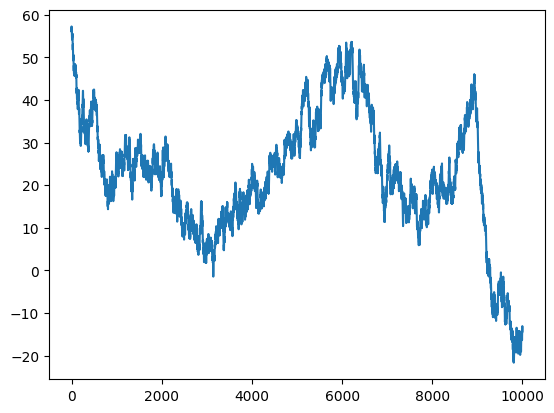

In [ ]:
import numpy as np

# Parameters
num_symbols = 10000
snr_db = 10  # SNR in dB

# Generate BPSK symbols (+1 or -1)
bpsk_symbols = np.random.choice([-1, 1], size=num_symbols)

# Modulation: Multiply symbols with carrier signal
carrier_freq = 1.0  # Carrier frequency
t = np.arange(0, num_symbols)
carrier_wave = np.cos(2 * np.pi * carrier_freq * t)

modulated_signal = bpsk_symbols * carrier_wave
# Sinc pulse shaping
sinc_pulse = np.sinc((t - num_symbols / 2) / num_symbols)  # Normalized sinc function

# Convolve the modulated signal with the sinc pulse
shaped_signal_sinc = np.convolve(modulated_signal, sinc_pulse, mode='same')
plt.plot(shaped_signal_sinc)
# Rectangular pulse shaping
rect_pulse = np.ones(num_symbols)

# Convolve the modulated signal with the rectangular pulse
shaped_signal_rect = np.convolve(modulated_signal, rect_pulse, mode='same')
# Add AWGN
noise_power = 10 ** (-snr_db / 10)
noisy_signal_sinc = shaped_signal_sinc + np.random.normal(0, np.sqrt(noise_power), num_symbols)
noisy_signal_rect = shaped_signal_rect + np.random.normal(0, np.sqrt(noise_power), num_symbols)

# Demodulation: Multiply with carrier again and integrate over a symbol duration
demodulated_sinc = noisy_signal_sinc * carrier_wave
demodulated_rect = noisy_signal_rect * carrier_wave

# Calculate received symbols by integrating over symbol duration
received_symbols_sinc = np.sum(demodulated_sinc.reshape(-1, num_symbols), axis=1)
received_symbols_rect = np.sum(demodulated_rect.reshape(-1, num_symbols), axis=1)

# Calculate BER
ber_sinc = np.sum(bpsk_symbols != np.sign(received_symbols_sinc)) / num_symbols
ber_rect = np.sum(bpsk_symbols != np.sign(received_symbols_rect)) / num_symbols

print(f"BER for sinc pulse: {ber_sinc}")
print(f"BER for rectangular pulse: {ber_rect}")


In [84]:
import numpy as np

# Parameters
num_symbols = 1000  # Number of transmitted symbols
snr_dB = 20  # Signal-to-noise ratio in dB
channel_length = 5  # Length of the channel

# Generate transmitted symbols
transmitted_symbols = np.random.randint(0, 4, num_symbols)  # QPSK symbols

# Modulation mapping (QPSK example)
modulation_mapping = {
    0: -1 - 1j,
    1: -1 + 1j,
    2:  1 - 1j,
    3:  1 + 1j
}
modulated_symbols = np.array([modulation_mapping[symbol] for symbol in transmitted_symbols])

# Channel generation (random channel coefficients)
channel_coefficients = np.random.randn(channel_length) + 1j * np.random.randn(channel_length)

# Apply channel to transmitted symbols
received_symbols = np.convolve(modulated_symbols, channel_coefficients, mode='same')

# Add Gaussian noise
noise_power = 10**(-snr_dB / 10)
noise = np.sqrt(noise_power / 2) * (np.random.randn(len(received_symbols)) + 1j * np.random.randn(len(received_symbols)))
received_symbols_with_noise = received_symbols + noise

# MMSE Equalization
equalized_symbols = np.zeros_like(received_symbols_with_noise, dtype=complex)
for i in range(len(received_symbols_with_noise) - channel_length + 1):
    h = np.flip(channel_coefficients)
    R = np.sum(np.abs(h)**2) + noise_power
    G = np.conj(h) / R
    equalized_symbols[i] = np.sum(G * received_symbols_with_noise[i:i+channel_length])

# Demodulation (QPSK example)
demodulated_symbols = np.zeros_like(equalized_symbols, dtype=int)
for i, symbol in enumerate(equalized_symbols):
    distances = [np.abs(symbol - value) for value in modulation_mapping.values()]
    demodulated_symbols[i] = np.argmin(distances)

# Calculate symbol error rate
symbol_errors = np.sum(demodulated_symbols != transmitted_symbols)
symbol_error_rate = symbol_errors / num_symbols
print(f"Symbol Error Rate: {symbol_error_rate:.4f}")



Symbol Error Rate: 0.5230
